# **Dubai Estates Price Prediction** 
<p>in this project we will predict the price of <strong>Dubai</strong> estates based on studing the <strong>2022</strong> transactions.</p>

## Model Evaluation
### Evaluation
#### Predictive Analysis

Here we will try to evaluate our models that we saved from the last stage, also using the train an test data that we defined.

From Previous we will get **(KNN, XGBoost, rtr and Neural network with one hidden layer and 200 units)**

In [41]:
#Models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

#Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
%matplotlib inline

Load the data

In [2]:
XTrain = pd.read_csv('data/TrainingDoneTrain.csv', index_col=[0])
yTrain =  XTrain.MeterPrice
XTrain = XTrain.drop('MeterPrice', axis=1)

XTest =  pd.read_csv('data/TrainingDoneTest.csv', index_col=[0])
yTest = XTest.MeterPrice
XTest = XTest.drop('MeterPrice', axis=1)

Load the models:
- KNN = K Nearest Neigbors.
- XGB = XGboost.
- RTR = Random Forest Regressor.
- NN = Neural Network.

In [21]:
knn = pickle.load(open('models/KNNTrained.sav', 'rb'))
xgboost = pickle.load(open('models/xgboostTrained.sav', 'rb'))
rtr = pickle.load(open('models/rtrTrained.sav', 'rb'))
nn = keras.models.load_model('models/nn200')

In [ ]:
predicted = {'KNN' : [], 'XGB' : [], 'RTR' : [], 'NN' : []}

temp = knn.predict(XTest)
temp = temp.reshape(1, 18132 )
predicted['KNN'] = [i for i in temp[0]]

predicted['XGB'] = xgboost.predict(XTest)

predicted['RTR'] = rtr.predict(XTest)

temp = nn.predict(XTest)
temp = temp.reshape(1, 18132 )
predicted['NN'] = [i for i in temp[0]]

In [24]:
predictedDF = pd.DataFrame().from_dict(predicted).transpose()

Calculate the metrics:
- r2 = R square.
- MAE = Mean Absolute Error.
- MSE = Mean Squared Error.
- Residuals = Sum of Residuals

In [157]:
models = ['KNN', 'XGB', 'RTR', 'NN']
scoresDict = {'models' : [], 'r2' : [], 'MAE' : [], 'MSE' : [], 'Residuals' : []}


for model in models: 
    scoresDict['models'].append(model)
    scoresDict['r2'].append(r2_score(yTest, predictedDF.transpose()[model]))
    scoresDict['MAE'].append(mean_absolute_error(yTest, predictedDF.transpose()[model]))
    scoresDict['MSE'].append(mean_squared_error(yTest, predictedDF.transpose()[model]))
    scoresDict['Residuals'].append(np.sum(np.power(yTest - predictedDF.transpose()[model], 2)))

scoresDF = pd.DataFrame().from_dict(scoresDict)
scoresDF.set_index('models', inplace=True)
scoresDF.head()



,r2,MAE,MSE,Residuals
models,,,,
KNN,0.671492,0.251703,0.174457,2704.794438
XGB,0.675089,0.250943,0.172547,2672.161981
RTR,0.674883,0.250025,0.172656,2696.127942
NN,0.636927,0.268539,0.192813,2523.808172


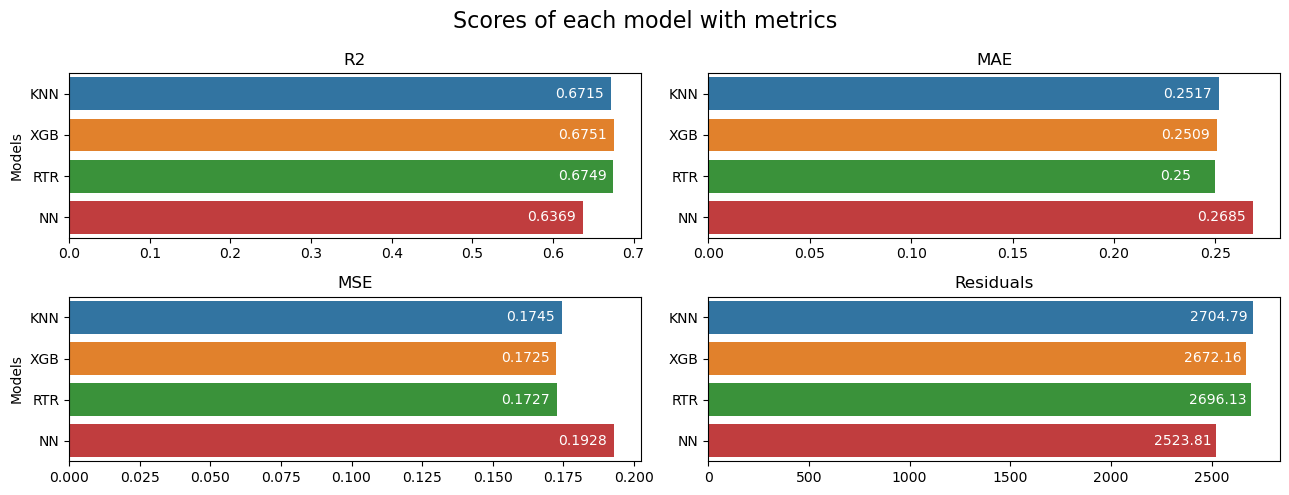

In [158]:
fig, axes = plt.subplots(2, 2,  figsize=(13, 5))
axes = axes.flatten()
fig.suptitle('Scores of each model with metrics', fontsize=16)

bar1 = sns.barplot(x=np.round(scoresDF['r2'].values, 4), y=scoresDF.index, ax=axes[0])
axes[0].set_title('R2')
axes[0].set_ylabel('Models')

for i in bar1.containers:
    bar1.bar_label(i,padding=-40, color='white')

bar2 = sns.barplot(x=np.round(scoresDF['MAE'].values, 4), y=scoresDF.index,ax=axes[1], )
axes[1].set_title('MAE')
axes[1].set_ylabel('')
for i in bar2.containers:
    bar2.bar_label(i,padding=-40, color='white')

bar3 = sns.barplot(x=np.round(scoresDF['MSE'].values, 4), y=scoresDF.index, ax=axes[2])
axes[2].set_title('MSE')
axes[2].set_ylabel('Models')

for i in bar3.containers:
    bar3.bar_label(i,padding=-40, color='white')

bar4 = sns.barplot(x=np.round(scoresDF['Residuals'].values, 4), y=scoresDF.index, ax=axes[3])
axes[3].set_title('Residuals')
axes[3].set_ylabel('')
for i in bar4.containers:
    bar4.bar_label(i,padding=-45, color='white')

fig.tight_layout()



After comparing between the models we find the following:

- **KNN, XGB and RTR** have almost the same values with **R2, MAE and MSE** metrics, but **XGB** is better than the others with *Sum of Residuals*, On the other hand **NN** is lower accurate than the others, but it has the lowest *Sum of Residuals*, So we will chose **XGB** as the basic model because it's fast. 